<a href="https://colab.research.google.com/github/ggoddll99/ds_study/blob/main/YB_3_22_Chipotle_Exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# set this so the graphs open internally
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv).

### Step 3. Assign it to a variable called chipo.

In [ ]:
chipo=pd.read_csv("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv", sep='\t', engine='python')
chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


### Step 4. See the first 10 entries

In [ ]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. Create a histogram of the top 5 items bought

* quantity : 주문 건수

In [ ]:
chipo_top=chipo.groupby('item_name').sum().sort_values(by='quantity', ascending=False)[['quantity']].head(5)
chipo_top

<ipython-input-4-230c54d0dd90>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  chipo_top=chipo.groupby('item_name').sum().sort_values(by='quantity', ascending=False)[['quantity']].head(5)


,quantity
item_name,
Chicken Bowl,761
Chicken Burrito,591
Chips and Guacamole,506
Steak Burrito,386
Canned Soft Drink,351


Text(0, 0.5, 'quantity')

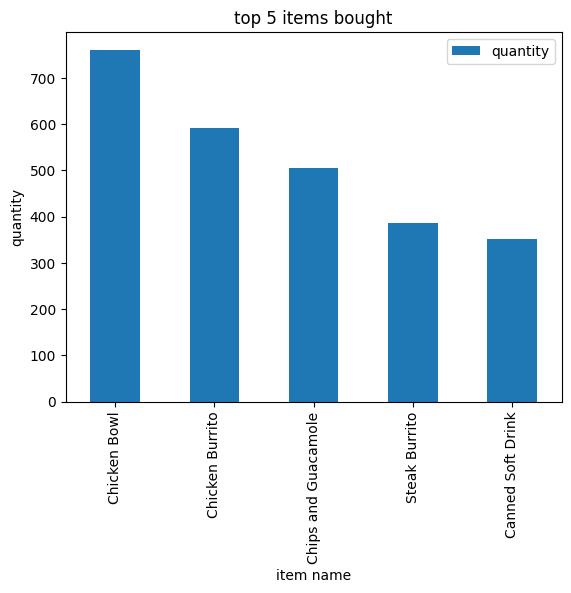

In [ ]:
chipo_top.plot(kind='bar')

plt.title('top 5 items bought') # 차트 제목
plt.xlabel('item name')                  # x축 이름
plt.ylabel('quantity')           # y축 이름

### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

In [ ]:
chipo.item_price = chipo.item_price.apply(lambda x: float(x[1:]))

# then groupby the orders and sum
n_ordered = chipo.groupby('order_id').sum()
n_ordered

<ipython-input-6-8b00e1eb54d6>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  n_ordered = chipo.groupby('order_id').sum()


,quantity,item_price
order_id,,
1,4,11.56
2,2,16.98
3,2,12.67
4,2,21.00
5,2,13.70
...,...,...
1830,2,23.00
1831,3,12.90
1832,2,13.20


Text(0, 0.5, 'quantity')

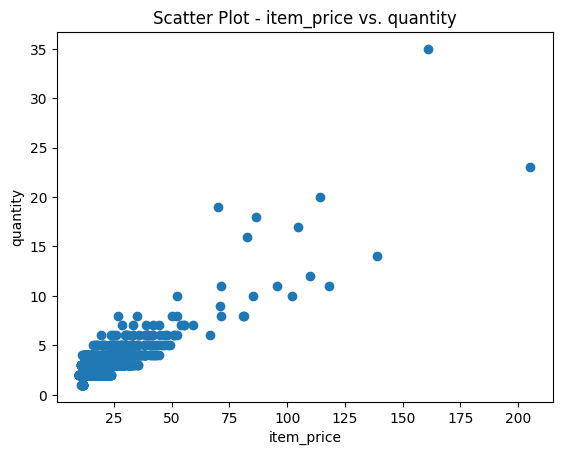

In [ ]:
plt.scatter(n_ordered.item_price, n_ordered.quantity)
plt.title('Scatter Plot - item_price vs. quantity')
plt.xlabel('item_price')
plt.ylabel('quantity')

### Step 7. BONUS: Create a question and a graph to answer your own question.